# Importamos paquetes


In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import glob
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from scipy import interp
import collections
from itertools import cycle

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import zipfile
import os

from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping

# Montamos drive

In [2]:
batch_size = 32 #Number of training examples
nb_classes = 4  #or 8
epochs = 5 #Number of iterations // Passes the entire training has completed
# Scaling input image to theses dimensions
img_rows, img_cols = 32, 32
labels = {
    'buffer_of': 0, 
    'bwget': 1, 
    'normal': 2,
    'traversal': 3
}

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
with zipfile.ZipFile("/content/drive/Shareddrives/EVFO/imagenes.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/Shareddrives/EVFO/images")

In [ ]:
import shutil
shutil.rmtree("/content/drive/Shareddrives/EVFO/images")

'\ndirs_in_traces = os.listdir("/content/drive/Shareddrives/EVFO/images")\nfor i in range(len(dirs_in_traces)):\n  if(".zip"  not in dirs_in_traces[i] and ".csv"  not in dirs_in_traces[i] and dirs_in_traces[i] != "images"):\n    shutil.rmtree("/content/drive/Shareddrives/var_datasets/EVFO/images/" + + dirs_in_traces[i] + "/")\n    os.remove("/content/drive/Shareddrives/var_datasets/dataset_imagenes/images/" + dirs_in_traces[i] + "/")\n\n'

#LOAD DATA FROM REPOSITORY

In [5]:
total_length =  len([f for f in os.listdir("/content/drive/MyDrive/mlblck/buffer_of") if os.path.isfile(os.path.join("//content/drive/MyDrive/mlblck/buffer_of", f))])
print("Buffer OF")
print(total_length)
print("BWGET")
print( len([f for f in os.listdir("/content/drive/MyDrive/mlblck/bwget") if os.path.isfile(os.path.join("/content/drive/MyDrive/mlblck/bwget", f))])) 

total_length += len([f for f in os.listdir("/content/drive/MyDrive/mlblck/bwget") if os.path.isfile(os.path.join("/content/drive/MyDrive/mlblck/bwget", f))])
print("NORMAL")
print(len([f for f in os.listdir("/content/drive/MyDrive/mlblck/normal") if os.path.isfile(os.path.join("/content/drive/MyDrive/mlblck/normal", f))]))
total_length += len([f for f in os.listdir("/content/drive/MyDrive/mlblck/normal") if os.path.isfile(os.path.join("/content/drive/MyDrive/mlblck/normal", f))])
print("Traversal")
print(len([f for f in os.listdir("/content/drive/MyDrive/mlblck/traversal") if os.path.isfile(os.path.join("/content/drive/MyDrive/mlblck/traversal", f))]))
total_length += len([f for f in os.listdir("/content/drive/MyDrive/mlblck/traversal") if os.path.isfile(os.path.join("/content/drive/MyDrive/mlblck/traversal", f))])
biggest_length = 0 
print(total_length)
print(len([f for f in os.listdir("/content/drive/MyDrive/mlblck/traversal") if os.path.isfile(os.path.join("/content/drive/MyDrive/mlblck/traversal", f))]))

Buffer OF
17
BWGET
92
NORMAL
78
Traversal
29
216
29


In [7]:
def load_images_data_asNp( ):
  global total_length
  global biggest_length
  path = "/content/drive/MyDrive/mlblck/"
  types = ['buffer_of' , 'bwget' , 'normal' , 'traversal']
  channels = 3
  X = np.ndarray(shape=(total_length  , img_cols, img_rows,  channels ),
                     dtype=np.float32)
  y = np.ndarray(shape=(total_length   ),
                     dtype=np.int32)
  print(X.shape)
  j = 0
  counter = 0
  counter2 = 0
  for i in range(len(types)):
    img_files = [f for f in os.listdir(path + types[i] + "/") if os.path.isfile(os.path.join(path + types[i] + "/", f))]
    img_files = shuffle(img_files)
    if(len(img_files) > biggest_length): biggest_length = len(img_files)
    for file in img_files: 
      if i== 2 or i ==3: counter2+=1
      img = Image.open(path + types[i] + "/" + file)
      img = img.resize((img_rows, img_cols))
      img = np.asarray(img)
      img = img/255.0 #Normalize the pixel values
      X[j]= img
      y[j] = labels[types[i]]
      j += 1
     
  X, y = shuffle(X, y, random_state=0)
  return X, y

In [8]:
X, y = load_images_data_asNp()
print(X.shape)
print(*y)

(216, 32, 32, 3)
(216, 32, 32, 3)
3 1 1 2 2 1 1 2 0 1 1 2 2 2 1 3 2 0 2 1 3 2 3 3 2 1 2 0 1 1 0 1 2 1 2 2 1 2 1 3 1 2 2 0 2 2 1 1 1 1 0 2 3 1 2 1 1 1 1 2 1 0 1 2 0 2 2 1 1 1 1 2 1 1 2 2 1 3 1 2 3 1 1 2 2 2 2 0 1 2 3 1 1 2 3 2 2 1 2 0 1 2 3 1 0 2 1 3 3 3 2 1 0 1 2 2 3 1 2 0 1 2 1 1 3 1 1 1 1 1 3 1 1 1 2 2 3 0 1 1 2 3 3 2 2 2 1 2 0 2 1 1 1 1 0 2 2 1 1 2 3 1 1 2 1 2 2 2 1 1 2 2 2 1 2 2 3 1 2 2 2 2 1 2 1 1 2 1 2 2 3 1 1 1 2 1 3 2 3 1 3 1 2 1 1 1 1 1 0 1 3 1 3 2 1 2


# Cargamos imagenes

#TRATAMIENTO DE IMÁGENES

In [9]:
def plot_symbols(X,y,n=15):
    index = np.random.randint(len(y), size=n)
    plt.figure(figsize=(25, 2))
    for i in np.arange(n):
        ax = plt.subplot(1,n,i+1)
        plt.imshow(X[index[i],:,:,:])
        plt.gray()
        ax.set_title(f'{y[index[i]]}-{index[i]}')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [10]:
def adjust_image(gamma): 
  from skimage import exposure
  for x_i in range(len(X)):
    X[x_i] = exposure.adjust_log(X[x_i],1) 
    X[x_i] = exposure.adjust_sigmoid(X[x_i],0.2) 
    X[x_i]= exposure.adjust_gamma(X[x_i],gamma)
    
  return

In [11]:
adjust_image(2)

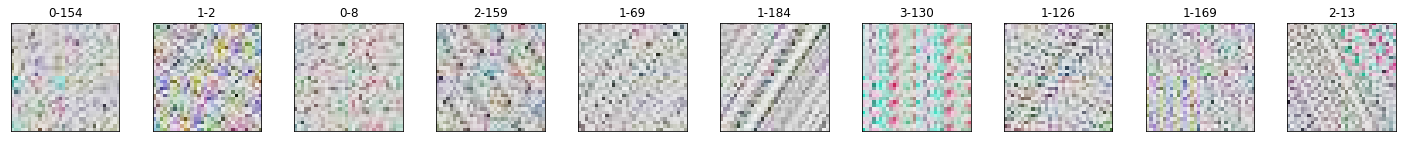

In [12]:
plot_symbols(X, y, 10)

In [68]:
print(biggest_length)

31


# Modelo base CNN

In [13]:
def cnn_model(activation_functions):
    v = Input(shape=(X.shape[1:]),name='img')
    #FIRST BRANCH
    conv = Conv2D(50,(5,5), padding='same')(v)
    activation_layer_1 = Activation(activation_functions[0])(conv)
    max_pooling_2d_1 = MaxPooling2D(pool_size=(2,2))(activation_layer_1)
    #SECOND BRANCH
    conv2 = Conv2D(90,(5,5), padding='valid')(max_pooling_2d_1)
    activation_layer_2 = Activation(activation_functions[1]) (conv2)
    max_pooling_2d_2 = MaxPooling2D(pool_size=(2,2)) (activation_layer_2)
    #THIRD BRANCH
    conv3 = Conv2D(120,(1,1), padding='valid')(max_pooling_2d_2)
    activation_layer_3 = Activation(activation_functions[1]) (conv3)
    max_pooling_2d_3 = MaxPooling2D(pool_size=(2,2)) (activation_layer_3)
    flatten = Flatten()(max_pooling_2d_3)
    #FOURTH BRANCH
    layer_dense_1 = Dense(120)(flatten)
    activation_layer_3 = Activation(activation_functions[2]) (layer_dense_1 )
    #LAST BRANCH 
    layer_dense_2 = Dense(84)(activation_layer_3)
    activation_layer_4 = Activation(activation_functions[3]) (layer_dense_2)
    layer_dense_3 = Dense(nb_classes)(activation_layer_4)
    activation_layer_5 = Activation(activation_functions[4]) (layer_dense_3)
    return Model(inputs=v , outputs=activation_layer_5)

{"class_name": "Functional", "config": {"name": "model", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "img"}, "name": "img", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "filters": 10, "kernel_size": [1, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv2d", "inbound_nodes": [[["img", 0, 0, {}]]]}, {"class_name": "Activation", "config": {"name": "activation", "trainable": true, "dtype": "float32", "activation": "relu"}, "nam

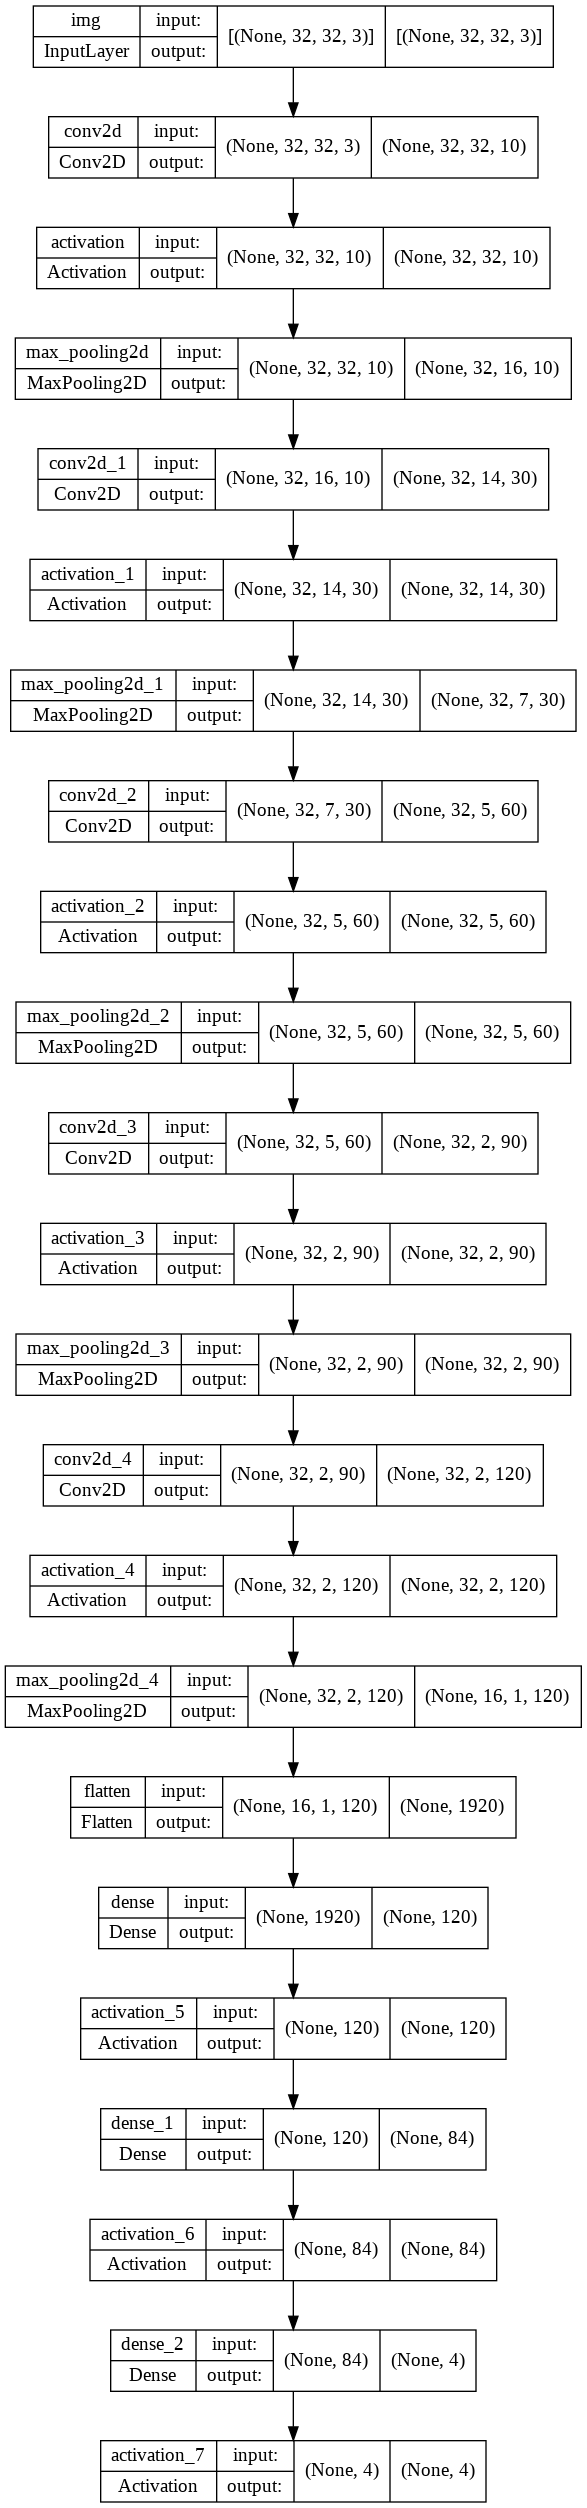

In [14]:
model  = cnn_model(["relu", "relu" , "relu" , "relu", "softmax"])
print( model.to_json() ) 
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(X.shape[1:])

(32, 32, 3)


#KFOLD VALIDATION,BALANCING AND OVERSIZING DATASETS


In [20]:
datagen = ImageDataGenerator(
  rotation_range=0,
  width_shift_range=0.01,
  height_shift_range=0.01,
  horizontal_flip=False)

In [16]:
best_model = cnn_model(["relu", "relu" , "relu" , "relu", "softmax"])
best_acc = 0
def get_score(X_train, X_test, y_train,  y_test, y_train_nn, y_test_nn, activation_function, optimizer , data_augmentation, batch_size , epochs, auc_per_fold, auc_percent_per_fold ):
  global best_model 
  global best_acc
  print("The batch and the epoch are  ", batch_size, ", " , epochs)
  model = cnn_model(activation_function)
  model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
  print(*y_train_nn)
  if data_augmentation == True:  
    datagen.fit(X_train)
    model.fit(datagen.flow(X_train, y_train_nn, batch_size=batch_size), steps_per_epoch=len(X_train) / batch_size, epochs=epochs)
  else: 
    early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
    model.fit(X_train, y_train_nn , batch_size=batch_size ,validation_split = 0.1, verbose=2, callbacks=[early_stopping] )
  #model.fit(datagen.flow(X_train, y_train_nn, batch_size=batch_size), steps_per_epoch=len(X_train) / batch_size, epochs=epochs) #, callbacks=[early_stopping])
  loss, acc = model.evaluate(X_test, y_test_nn,verbose= 0)
  y_scores = model.predict(X_test) # Confidence prediction per class
  y_pred = y_scores.argmax(axis=1) # Select classes with most confidence prediction
  print('Predictions', collections.Counter(y_pred),'\n')
  if acc > best_acc:
    best_acc = acc
    best_model = model
  print('Confusion matrix')
  print(metrics.confusion_matrix(y_test,y_pred),'\n')
  target_names = ['buffer_of' , 'bwget' , 'normal' , 'traversal']
  print("FINAL SHAPES")
  print(y_test.shape)
  print(*y_test)
  print(*y_pred)
  print(y_pred.shape)
  print(metrics.classification_report(y_test, y_pred, target_names=target_names))
  auc_per_fold.append(metrics.roc_auc_score(y_test, y_scores, multi_class = "ovr"))
  auc_percent_per_fold.append(metrics.roc_auc_score(y_test, y_scores, multi_class = "ovr")*100)
  print(f'AUC {metrics.roc_auc_score(y_test, y_scores, multi_class = "ovr"):.4f} ')
  model.save_weights("/content/drive/MyDrive/mlblck/" + str(acc) +  "weights.hdf5")
  return loss, acc, auc_per_fold, auc_percent_per_fold, model

In [17]:

def balance_X_train(X_train, y_train): 
  global biggest_length
  biggest_length = 0 
  for i in range(len(labels)): 
    if biggest_length < len(y_train[y_train == i]): 
      biggest_length = len(y_train[y_train == i])

    for j in range(len(labels)): 
      X_train_0 = X_train[y_train[y_train == i]].view()
      y_train_0 = y_train[y_train == i].view()
      print("Getting the len of the arrays " , len(X_train_0) , " " , len(y_train_0))
      #print(y_train_0)
      print("The old size was " ,X_train_0.shape[0] )
      #Setting the x_train and the y_train to the balancing size
      #if size_to_add > 0:     
      while len(y_train[y_train==i]) <500:
        y_train = np.append(y_train ,y_train_0[0:int(len(y_train_0)/2)] ,axis = 0)
        X_train = np.append(X_train, X_train_0[0:int(len(y_train_0)/2)] , axis =0) 
    
  print("FINAL LEN VALUES") 
  print( "0:" +  str(y_train[y_train== 0 ].shape[0]))
  print( "1:" + str(y_train[y_train== 1 ].shape[0]))
  print( "2:" + str(y_train[y_train== 2 ].shape[0]))
  print( "3:" + str(y_train[y_train== 3 ].shape[0]))
  return X_train,y_train

In [18]:
full_test_X = []
full_test_Y = []
def cross_validation( k , activation_function , optimizer, data_augmentation ,batch_size_new, epochs_new):
  batch_size = batch_size_new
  epochs = epochs_new
  auc_per_fold = []
  auc_percent_per_fold = []
  acc_per_fold = []
  acc_percent_per_fold = []
  loss_per_fold = []
  kf = StratifiedKFold(n_splits=k )
  for train_index, test_index in kf.split(X,y): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    full_test_X.append(X_test)
    full_test_Y.append( y_test)
    print("Before " ,  X_train.shape)
    #Balancing the dataset if it's necessary (Solo cuando es 0 y 1 )
    X_train, y_train= balance_X_train(X_train , y_train)
    print("After " ,  X_train.shape)
    # Convert integers to one-hot vector
    y_train_nn = keras.utils.to_categorical(y_train, nb_classes)
    y_test_nn = keras.utils.to_categorical(y_test, nb_classes)
    print(f'X_train {X_train.shape} X_test {X_test.shape}')
    print(f'y_train {y_train.shape} y_test {y_test.shape}')
    print(f'y_train_nn {y_train_nn.shape} y_test_nn {y_test_nn.shape}')
    actual_loss, actual_acc, auc_per_fold, auc_percent_per_fold, model= get_score(X_train, X_test, y_train, y_test, y_train_nn, y_test_nn , activation_function, optimizer, data_augmentation, batch_size_new, epochs_new , auc_per_fold , auc_percent_per_fold )
    print(f'loss: {actual_loss:.2f} acc: {actual_acc:.2f}')
    acc_per_fold.append(actual_acc)
    loss_per_fold.append(actual_loss)
    acc_percent_per_fold.append(actual_acc*100) #For getting the wilcoxon 
  return acc_per_fold, loss_per_fold, auc_per_fold, acc_percent_per_fold, auc_percent_per_fold,  model
  #return X_train_output, X_test_output, y_test_nn_output, y_train_nn_output, y_test_output, y_train_output;

In [22]:
acc_per_fold, loss_per_fold, auc_per_fold, acc_percent_per_fold, auc_percent_per_fold,  model = cross_validation(3 , ["relu", "relu" , "relu" , "relu", "softmax"] , 'adam' , True ,32 ,5)
print(acc_per_fold)
print(loss_per_fold)
print("AUC PER FOLD " , auc_per_fold)
print(model.summary())

print("SACAMOS LOS PESOS DEL MODELO POR PANTALLA")
res = model.get_weights()
print(res)

#loss, acc = get_score(X_train, X_test, y_train_nn, y_test_nn)

Before  (144, 32, 32, 3)
Getting the len of the arrays  12   12
The old size was  12
Getting the len of the arrays  504   504
The old size was  504
Getting the len of the arrays  504   504
The old size was  504
Getting the len of the arrays  504   504
The old size was  504
Getting the len of the arrays  61   61
The old size was  61
Getting the len of the arrays  511   511
The old size was  511
Getting the len of the arrays  511   511
The old size was  511
Getting the len of the arrays  511   511
The old size was  511
Getting the len of the arrays  52   52
The old size was  52
Getting the len of the arrays  520   520
The old size was  520
Getting the len of the arrays  520   520
The old size was  520
Getting the len of the arrays  520   520
The old size was  520
Getting the len of the arrays  19   19
The old size was  19
Getting the len of the arrays  505   505
The old size was  505
Getting the len of the arrays  505   505
The old size was  505
Getting the len of the arrays  505   505
T

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Getting the len of the arrays  501   501
The old size was  501
Getting the len of the arrays  501   501
The old size was  501
Getting the len of the arrays  501   501
The old size was  501
Getting the len of the arrays  62   62
The old size was  62
Getting the len of the arrays  527   527
The old size was  527
Getting the len of the arrays  527   527
The old size was  527
Getting the len of the arrays  527   527
The old size was  527
Getting the len of the arrays  52   52
The old size was  52
Getting the len of the arrays  520   520
The old size was  520
Getting the len of the arrays  520   520
The old size was  520
Getting the len of the arrays  520   520
The old size was  520
Getting the len of the arrays  19   19
The old size was  19
Getting the len of the arrays  505   505
The old size was  505
Getting the len of the arrays  505   505
The old size was  505
Getting the len of the arrays  505   505
The old size was  505
FINAL LEN VALUES
0:501
1:527
2:520
3:505
After  (2053, 32, 32, 3

In [ ]:
print("EL TIPO DE LO QUE ESTAMOS SACANDO ES")
print(type(res))
print("LA CONVERTIMOS EN UNA CADENA")
print(str(res))
print(type(str(res)))

EL TIPO DE LO QUE ESTAMOS SACANDO ES
<class 'list'>
LA CONVERTIMOS EN UNA CADENA
[array([[[[ 0.05296282,  0.03981931,  0.05067199, ...,  0.03313583,
          -0.00829319,  0.05995647],
         [ 0.02759786,  0.01375029, -0.01384447, ...,  0.00600466,
          -0.05445611,  0.03132845],
         [ 0.02802934,  0.0432101 ,  0.02542879, ...,  0.07006472,
          -0.00962787,  0.02166869]],

        [[ 0.00985809, -0.02264338, -0.0513991 , ...,  0.05255429,
          -0.08617049,  0.02114782],
         [-0.04620628,  0.05266322, -0.06483774, ..., -0.04933285,
          -0.04467578, -0.04020402],
         [ 0.06157438,  0.04092348, -0.03256331, ...,  0.06599672,
          -0.08530926, -0.04068931]],

        [[-0.01262666, -0.00689157, -0.07419106, ...,  0.02624986,
           0.0529715 , -0.03080825],
         [ 0.01151079,  0.00760542,  0.00450185, ...,  0.00021797,
           0.01505623,  0.00279163],
         [ 0.00782756, -0.00129178, -0.06731819, ...,  0.02735128,
           0.01

In [ ]:
best_model.save_weights("/content/drive/Shareddrives/EVFO/" + "weights.hdf5")

In [ ]:
model.save_weights("/content/drive/Shareddrives/var_datasets/" + "weights.hdf5")